In [59]:
from Test_basemodel_functions import figure_layout
import pandas as pd
fullYeardata = pd.read_csv("D:\Onedrive\Leuven\Final project\data\Forecasting_writtendata\FullYear.csv",index_col= "date",parse_dates= True)


In [60]:
null_serie = fullYeardata.isnull().sum()

In [61]:
null_serie

0x096fa3d4f7a692bca65dfae1a7fcc01089685b58    1344
0x0d65536896a29a82ce55a81d592c3a9c6c0f797b    1584
0xddfe42d6b1d34d71ffcb1e4c58b1a8b2f9c03a80    1344
0x62e55dbe3cdd3cac46d61144544f6c488041de48    1392
0x88fc9ea558b9a98e3fc91ec0044b3c83ac630790    1392
                                              ... 
0x7dd7a7b8ee1bec7c44b24f738c752482f6161065    1392
0xfdaf9f857621ec06f2cf801f42a020a322835090    2400
0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18    1344
0x47218b46abb2fcaade487a211911406dc6e13730    1296
0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd    1392
Length: 261, dtype: int64

In [62]:
# select the three time-series that contain the least missing values.
sorted_list = sorted(list(enumerate(null_serie.values)), key=lambda x: x[1])
names = []
amount_series = 10
for (index,_) in sorted_list[:amount_series]:
    names.append(fullYeardata.columns[index])


In [63]:
DF_three_series = fullYeardata.loc[:, [names[0],names[1],names[3]]]

In [64]:
av_temperature = pd.read_csv("D:\Onedrive\Leuven\Final project\data\weather-avg.csv",index_col='meter_id')
av_temperature = av_temperature.transpose()
av_temperature.index = pd.to_datetime(av_temperature.index)

In [65]:
# when I check the time-series, names[2] is a bit weird.
DF_temp_three_series = av_temperature.loc[:, [names[0],names[1],names[3]]]

In [66]:
from os import makedirs
data_path = "./data/"
makedirs(data_path,exist_ok=True)

DF_three_series.to_csv(data_path+"DF_three_series.csv",index_label= 'date')
DF_temp_three_series.to_csv(data_path+"DF_three_temp_series.csv",index_label= 'meter_id')

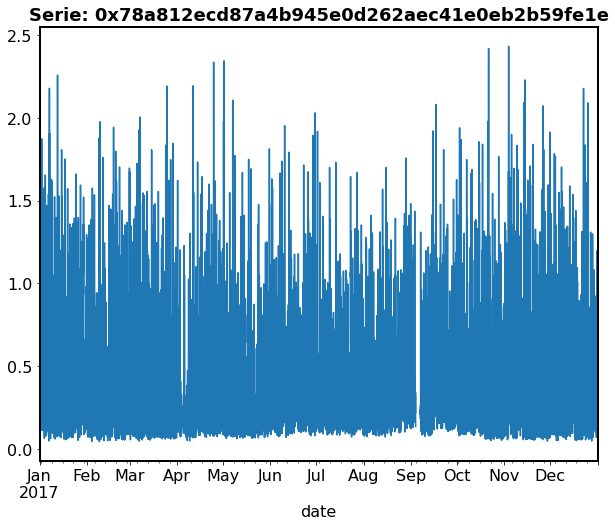

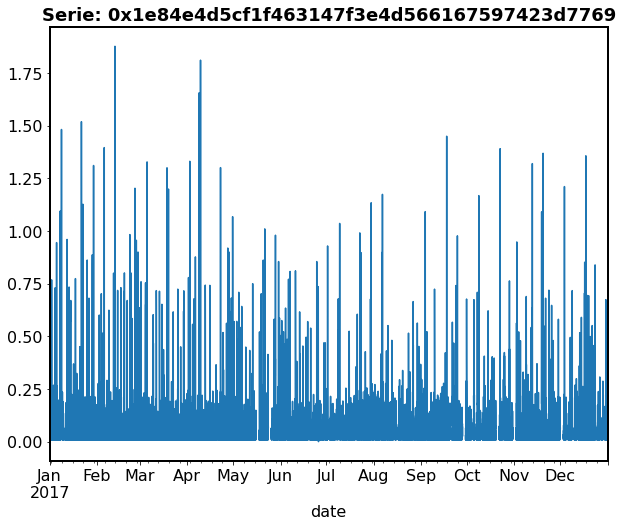

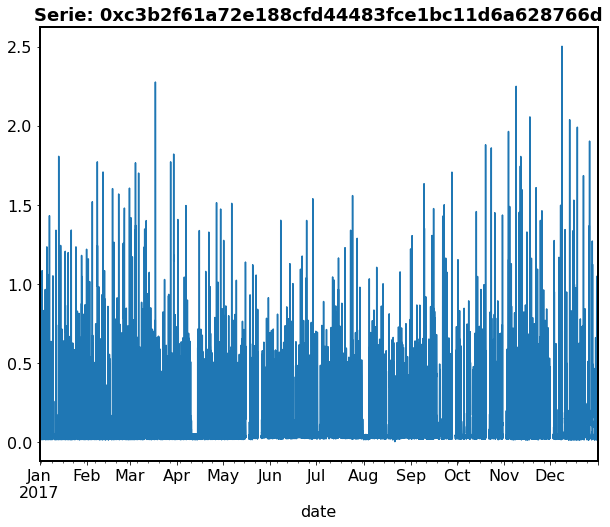

In [67]:
from os import path
import matplotlib.pyplot as plt
save_to = "D:\Onedrive\Leuven\Final project\Results\Forecasting\Base_model_figures\\three_series"
for col in DF_three_series.columns:
    fname = path.join(save_to,"Serie"+str(col))
    figure_layout(titel='Serie: '+ str(col))
    DF_three_series.loc[:,col].plot()
    plt.savefig(fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)
plt.show()